In [11]:
import pandas as pd
import json
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
###### entity info dataframe ######
df_ent_info = pd.read_csv("ent_info.csv", index_col=0)
df_ent_info.head()

,entity_id,entity,entity_desc
0,/m/027rn,Dominican Republic,"""The Dominican Republic is a nation on the island of Hispaniola, part of the Greater Antilles archipelago in the Caribbean region. The western three-eighths of the island is occupied by the nation of Haiti, making Hispaniola one of two Caribbean islands, along with Saint Martin, that are shared by two"
1,/m/06cx9,Republic,"""A republic is a form of government in which power is held by the people and representatives they elect, and affairs of state are a \""public matter\"", rather than privately accommodated. In modern times the definition of a republic is also commonly limited to a government which excludes a monarch."
2,/m/017dcd,Mighty Morphin Power Rangers,"""Mighty Morphin Power Rangers is an American live action children's television series that premiered on August 28, 1993, on the Fox Kids weekday afternoon block. The show is about a group of teenagers who were chosen to protect the world from a group of alien invaders and were given the"
3,/m/06v8s0,Wendee Lee,"""Wendee Lee is an American voice actress. While she has done voice work for many video games as well as several episodes in the Power Rangers franchise, she is particularly prolific in the dubbing of anime. As of April 2009, with 223 credits to her name, she has more credits"
4,/m/07s9rl0,Drama,"""Drama in entertainment media is a genre involved usually with in the depiction of realistic characters and emotional themes. Dramatic themes may include alcoholism, drug addiction, infidelity, moral dilemmas, racial prejudice, religious intolerance, poverty, class divisions, violence against women and corruption put the characters in conflict with themselves, others, society"


In [94]:
concept_dict={
    0: "actor/actress", #aaa
    1: "film/comedy",#/show/drama #aa
    2: "fiction/novel/book", #aa
    3: "author/writer",#aaa
    4: "composer/musician",#/producer/songwriter/singer #aaa
    5: "country", #
    6: 'states/area/city', #a
    7: "University", #a
    8: "Subject/science", #aaaa
    9: "genre", #aaaa
    10: "instrument", #aa
    11: "award", #aaa
    12: "sports/team", #aaa
    13: "company/brand",
    14: "religion",
    15: "others"
}
56
12
04

In [ ]:
concept = [
'university',
'city',
'college',
'actor',
'player',
'book',
'country',
'film',
'series',
'comedy',
'band',
'singer',
'team',
'drummer',
'writer',
'actress',
'sport',
'state',
'cities',
'states',
'member',
'club',
'director',
'novelist',
'show',
'producer',
'program',
'philosopher',
'screenwriter',
'person',
'form',
'art',
'guitarist',
'county',
'teacher',
'footballer',
'stage',
'award',
'awards',
'violinist'
'capital',
'president',
'instrument'
'singer-songwriter',
'chhoreographer',
'photographer',
'channel',
'miniseries',
'designer',
'dynasty',
'filmmaker',
'artist'
]

In [7]:
type(df_ent_info['entity_desc'][1])

str

In [121]:
feature_list = []
for i in range(df_ent_info.shape[0]):
    str1 = str(df_ent_info['entity_desc'][i]).lower()
    if "subject" in str1 or "research" in str1 or "study" in str1 or "math" in str1:
        feature_list.append(8)
    elif "singer" in str1 or "composer" in str1 or "musician" in str1 or "producer" in str1 or "songwriter" in str1 or "artist" in str1 or "band" in str1 or "rapper" in str1:
        feature_list.append(4)
    elif "genre" in str1 or "style" in str1:
        feature_list.append(9)
    elif "actor" in str1 or "actress" in str1:
        feature_list.append(0)
    elif "award" in str1:
        feature_list.append(11)
    elif "sport" in str1 or "ball" in str1 or "team" in str1 or "race" in str1 or "player" in str1:
        feature_list.append(12)
    elif "author" in str1 or "writer" in str1 or "director" in str1 or "filmmaker" in str1 or "designer" in str1 or "novelist" in str1 or "tographer" in str1:
        feature_list.append(3)
    elif "film" in str1 or "comedy" in str1 or "show" in str1 or "drama" in str1 or "opera" in str1 or "anime" in str1 or "movie" in str1:
        feature_list.append(1)
    elif "fiction" in str1 or "novel" in str1 or "book" in str1:
        feature_list.append(2)
    elif "instrument" in str1 or "acoustic" in str1 or "music" in str1 or 'chorus' in str1:
        feature_list.append(10)
    elif "university" in str1 or "college" in str1:
        feature_list.append(7)
    elif "religion" in str1 or "party" in str1:
        feature_list.append(14)
    elif ("city" in str1 or "state" in str1 or "county" in str1) and "country" not in str1:
        feature_list.append(6)
    elif "country" in str1 or "nation" in str1 or "republic" in str1 or "continent" in str1 or "region" in str1 or "dynasty" in str1:
        feature_list.append(5)
    elif "company" in str1 or "ltd" in str1 or "brand" in str1:
        feature_list.append(13)
    
    else:
        feature_list.append(15)#not filtered     
    
        

<AxesSubplot:>

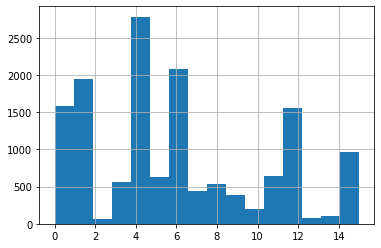

In [122]:
fs = pd.Series(feature_list)
fs.hist(bins = 16)

In [123]:
df_ent_info.iloc[fs[fs ==15].index]

,entity_id,entity,entity_desc,concept_class,concept_name
98,/m/060bp,Prime minister-GB,"""A prime minister is the most senior minister of cabinet in the executive branch of government in a parliamentary system. In many systems, the prime minister selects and may dismiss other members of the cabinet, and allocates posts to members within the government. In most systems, the prime minister is",15,others
141,/m/05zppz,Male,"""A male organism is the physiological sex which produces sperm. Each spermatozoon can fuse with a larger female gamete, or ovum, in the process of fertilization. A male cannot reproduce sexually without access to at least one ovum from a female, but some organisms can reproduce both sexually and asexually.",15,others
142,/m/01rk91,Internship,"""An internship can be a method of on-the-job training for white-collar and professional careers, yet there are no formal standards defining them as such. Internships for professional careers are similar in some ways to apprenticeships for trade and vocational jobs, but the lack of standardization and oversight leaves the term",15,others
152,/m/01mw1,Video game,"""A video game is an electronic game that involves human interaction with a user interface to generate visual feedback on a video device. The word video in video game traditionally referred to a raster display device, but it now implies any type of display device that can produce two- or",15,others
169,/m/0dq3c,Vice President-GB,"""A vice president is an officer in government or business who is below a president in rank. The name comes from the Latin vice meaning 'in place of'. In some countries, the vice president is called the deputy president. In everyday speech, the abbreviation VP can be used.""@en",15,others
...,...,...,...,...,...
14509,/m/0jq47,Mercenary-GB,"""Soldier of fortune (also known as mercenary) is a soldier who sells his services.""@en",15,others
14515,/m/0qb7t,Organization,"""An organization is a social entity that has a collective goal and is linked to an external environment. The word is derived from the Greek word organon, itself derived from the better-known word ergon which means \""organ\"" .""@en",15,others
14518,/m/027qb1,Commissioner-GB,"""A commissioner is, in principle, the title given to a member of a commission or to an individual who has been given a commission.\nIn practice, the title of commissioner has evolved to include a variety of senior officials, often sitting on a specific commission. In particular, commissioner frequently refers to",15,others
14528,/m/03tp4,Infectious disease,NaN,15,others


In [124]:
df_ent_info['concept_class'] = feature_list

In [125]:
df_ent_info.head()

,entity_id,entity,entity_desc,concept_class,concept_name
0,/m/027rn,Dominican Republic,"""The Dominican Republic is a nation on the island of Hispaniola, part of the Greater Antilles archipelago in the Caribbean region. The western three-eighths of the island is occupied by the nation of Haiti, making Hispaniola one of two Caribbean islands, along with Saint Martin, that are shared by two",5,country
1,/m/06cx9,Republic,"""A republic is a form of government in which power is held by the people and representatives they elect, and affairs of state are a \""public matter\"", rather than privately accommodated. In modern times the definition of a republic is also commonly limited to a government which excludes a monarch.",6,states/area/city
2,/m/017dcd,Mighty Morphin Power Rangers,"""Mighty Morphin Power Rangers is an American live action children's television series that premiered on August 28, 1993, on the Fox Kids weekday afternoon block. The show is about a group of teenagers who were chosen to protect the world from a group of alien invaders and were given the",1,film/comedy
3,/m/06v8s0,Wendee Lee,"""Wendee Lee is an American voice actress. While she has done voice work for many video games as well as several episodes in the Power Rangers franchise, she is particularly prolific in the dubbing of anime. As of April 2009, with 223 credits to her name, she has more credits",0,actor/actress
4,/m/07s9rl0,Drama,"""Drama in entertainment media is a genre involved usually with in the depiction of realistic characters and emotional themes. Dramatic themes may include alcoholism, drug addiction, infidelity, moral dilemmas, racial prejudice, religious intolerance, poverty, class divisions, violence against women and corruption put the characters in conflict with themselves, others, society",9,genre


In [126]:
df_ent_info['concept_name'] = [concept_dict[a] for a in feature_list]

In [127]:
df_ent_info.head(20)

,entity_id,entity,entity_desc,concept_class,concept_name
0,/m/027rn,Dominican Republic,"""The Dominican Republic is a nation on the island of Hispaniola, part of the Greater Antilles archipelago in the Caribbean region. The western three-eighths of the island is occupied by the nation of Haiti, making Hispaniola one of two Caribbean islands, along with Saint Martin, that are shared by two",5,country
1,/m/06cx9,Republic,"""A republic is a form of government in which power is held by the people and representatives they elect, and affairs of state are a \""public matter\"", rather than privately accommodated. In modern times the definition of a republic is also commonly limited to a government which excludes a monarch.",6,states/area/city
2,/m/017dcd,Mighty Morphin Power Rangers,"""Mighty Morphin Power Rangers is an American live action children's television series that premiered on August 28, 1993, on the Fox Kids weekday afternoon block. The show is about a group of teenagers who were chosen to protect the world from a group of alien invaders and were given the",1,film/comedy
3,/m/06v8s0,Wendee Lee,"""Wendee Lee is an American voice actress. While she has done voice work for many video games as well as several episodes in the Power Rangers franchise, she is particularly prolific in the dubbing of anime. As of April 2009, with 223 credits to her name, she has more credits",0,actor/actress
4,/m/07s9rl0,Drama,"""Drama in entertainment media is a genre involved usually with in the depiction of realistic characters and emotional themes. Dramatic themes may include alcoholism, drug addiction, infidelity, moral dilemmas, racial prejudice, religious intolerance, poverty, class divisions, violence against women and corruption put the characters in conflict with themselves, others, society",9,genre
5,/m/0170z3,American History X,"""American History X is a 1998 American drama film directed by Tony Kaye and written by David McKenna. It stars Edward Norton and Edward Furlong, and co-stars Fairuza Balk, Stacy Keach, Elliott Gould, Avery Brooks, Ethan Suplee and Beverly D'Angelo. The film was released in the United States on October",1,film/comedy
6,/m/01sl1q,Michelle Rodriguez,"""Mayte Michelle Rodriguez, simply credited as Michelle Rodriguez, is an American actress, screenwriter and disc jockey. Rodriguez got her breakout role in the independent film Girlfight, which was met with critical acclaim for her performance as a troubled boxer, and earned her several awards, including the Independent Spirit Award and",0,actor/actress
7,/m/044mz_,Naveen Andrews,"""Naveen William Sidney Andrews is a British actor. He is best known for portraying Sayid Jarrah in the television series Lost, Kip in the film The English Patient and Sanjay in the 2002 remake of Rollerball. For his role on Lost, Andrews was nominated for a Golden Globe in 2006,",0,actor/actress
8,/m/0cnk2q,Australia national association football team,"""The Australia national association football team represents Australia in international men's association football. The team is controlled by the governing body for association football in Australia, Football Federation Australia, which is currently a member of the Asian Football Confederation and the regional ASEAN Football Federation since leaving the Oceania Football",12,sports/team
9,/m/02nzb8,Midfielder,"""A midfielder is an association football position. Midfielders are generally positioned on the field between their team's defense and forwards. Some midfielders play a more defensive role, while others blur the boundaries between midfielders and forwards. The number of midfielders on the team and their assigned roles depends on the",12,sports/team


In [128]:
df_ent_info.to_csv("./string_matching_concept.csv")